In [1]:
import array
from array import array
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
from scipy.signal import find_peaks
import numpy as np
import math
from math import sqrt

In [2]:
##List of measured points by U
Ulist = ['54,00','55,00','55,50','55,87','56,00','56,50']
##Ulist = ['55,87']

PSAUGAIN = '45' # in dB

##set up the correct file name with data in format: "path + "/" + prefix + {U} + fileName"
path = "laserOn3-50/45dB"
prefix = "sipm_laserOn_" 
fileName = "V_45dB_histo.txt"

outSpectr = 'V_spectr.png'   #format: "{U} + outSpectr"
outR = 'R_Bias.png'
outEff = 'Eff_Bias.png'
outmu = 'mu_Bias.png'
outGain = 'Gain_Bias.png'

analysis = True
#set up draw X range limits
Xleft = -200
Xright = 4000
##set up right X axis limit on plot for fit
FitXLimitP0 = 400.
FitXLimitLeftP1 = np.array([250,700,1000,1200,1400,1500])
FitXLimitRightP1 = np.array([650,1300,1600,1700,1800,2100])

In [3]:
##determine functions for fit the data
def Gauss(x, a, x0, s):
    return a*np.exp(-((x-x0)/s)**2)

def DoubleGauss(x, a1, x01, s1, a2, x02, s2):
    return Gauss(x, a1, x01, s1) + Gauss(x, a2, x02, s2)

def nGauss(x, *p):
    n = len(p)/3
    res = 0
    for i in range(n):
        res += Gauss(x, p[i*3], p[i*3+1], p[i*3+2])
    return res

def plotAllGauss(x, p):
    n = len(p)//3
    for i in range(n):
        plt.plot(x, Gauss(x,p[i*3],p[i*3+1],p[i*3+2]), 'b', linewidth=0.5)

0 peak: Параметры гауссианов:  [3.58516863e+03 2.39506100e+00 4.73264183e+01 5.00000000e+03
 2.80190816e+00 3.83109174e+01]
0 peak: cov0:  [2.41157897e+04 3.52801563e+00 3.24775788e+01 2.40811736e+04
 2.19308518e+00 2.09700099e+01]
Стандартное отклонение:  157.44457481585266
Квадрат коэффициента корреляции:  0.9902696732893096
1 peak: Параметры гауссианов:  [5259.28283659  478.69310822   70.62725123 5334.78934335  491.531
   53.07871314]
Стандартное отклонение:  65.12932317648514
Квадрат коэффициента корреляции:  0.9996732696983754
mean0= 2.8019081558281225 +- 2.1930851763030015  sigma0= 38.310917403393155 +- 20.970009917386616
mean1= 491.53099999999773 +- 1.7361104187587246  sigma1= 53.078713142410415 +- 3.2219826141706576
R= 13.303376804083909  Gain= 687081.4129168153 +- 5523.872644647733
Eff= 83.91697328427452 +- 1.800911854103333  mu= 1.827405711360156 +- 0.11875642912878193  NevP0= 80428.0  NevTotal= 500080.0


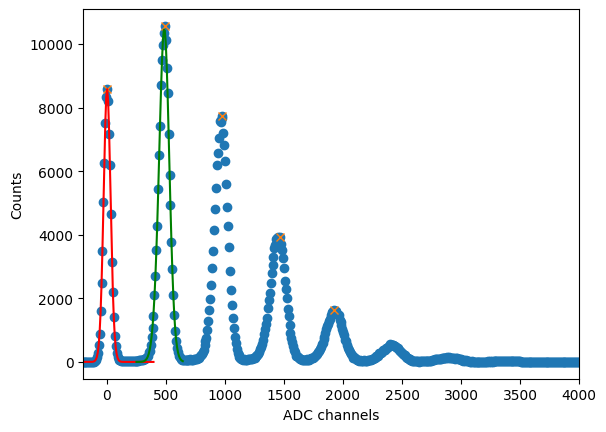

0 peak: Параметры гауссианов:  [  87.27652094    3.521        73.95453423 1568.89485312    3.521
   43.85938813]
0 peak: cov0:  [416.94795743  20.54960167  89.12785549 409.50971481   0.88035306
   3.81825872]
Стандартное отклонение:  46.184229049413084
Квадрат коэффициента корреляции:  0.9793052025950851
1 peak: Параметры гауссианов:  [1387.33119366 1019.23149548   77.83279229 2264.22423952 1034.09603959
   60.79121294]
Стандартное отклонение:  31.295702602038578
Квадрат коэффициента корреляции:  0.9992808179631189
mean0= 3.5209999999999995 +- 0.8803530597612739  sigma0= 43.85938812626345 +- 3.818258724884167
mean1= 1034.0960395944774 +- 2.8631269100816645  sigma1= 60.791212943034665 +- 4.720047703789151
R= 24.482562559860007  Gain= 1448837.333684137 +- 5262.783717662514
Eff= 96.65213565829467 +- 0.41213405855063456  mu= 3.3968475533856926 +- 0.1313663914805412  NevP0= 16742.0  NevTotal= 500080.0


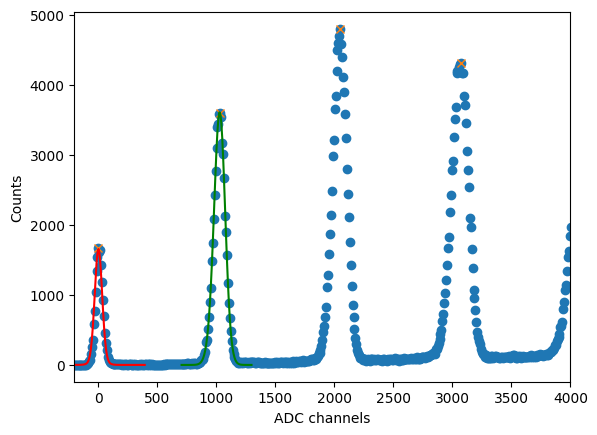

0 peak: Параметры гауссианов:  [ 66.20548059  14.63969704  20.22391822 905.46654568  14.38137542
  47.2073571 ]
0 peak: cov0:  [17.29486903  1.25411717  3.53458128 18.03104281  0.14015841  0.39480709]
Стандартное отклонение:  5.56609497496984
Квадрат коэффициента корреляции:  0.999100807422446
1 peak: Параметры гауссианов:  [1152.12617641 1299.548        62.23098489 1128.53201232 1288.12158627
   82.5542892 ]
Стандартное отклонение:  23.971060449739742
Квадрат коэффициента корреляции:  0.9989457289271249
mean0= 14.639697043627613 +- 1.2541171680904355  sigma0= 20.22391821784761 +- 3.5345812821856764
mean1= 1299.5479999999986 +- 3.1591581566186013  sigma1= 62.2309848853189 +- 6.861971619263785
R= 21.832462086488583  Gain= 1806392.5945814203 +- 6204.41773631687
Eff= 98.0421132618781 +- 0.5813069908814583  mu= 3.9333044892516225 +- 0.35226371802264156  NevP0= 9791.0  NevTotal= 500080.0


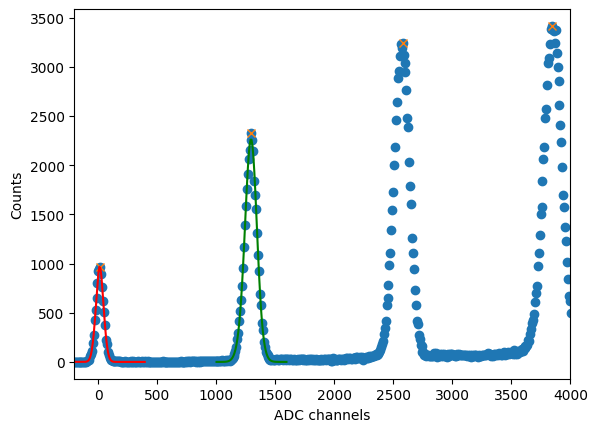

0 peak: Параметры гауссианов:  [ 51.91542719  11.521        9.27274183 652.29028942  11.521
  50.80297511]
0 peak: cov0:  [27.93973662  3.65090981  5.71527796 18.13505911  0.66904577  1.16194885]
Стандартное отклонение:  23.259042108577024
Квадрат коэффициента корреляции:  0.9712784429419529
1 peak: Параметры гауссианов:  [1494.0943856  1486.10365182   80.37403683  221.54668362 1499.552
   46.35903752]
Стандартное отклонение:  15.749906213269448
Квадрат коэффициента корреляции:  0.9992686523545554
mean0= 11.520999999999999 +- 3.6509098099118233  sigma0= 9.272741831217514 +- 5.715277959033115
mean1= 1499.5519999999997 +- 2.9073227484351074  sigma1= 46.359037518719234 +- 7.370073021228676
R= 32.75999110794312  Gain= 2091953.3111608 +- 9219.912969418265
Eff= 98.71777438268396 +- 0.45373829159234447  mu= 4.356572854427724 +- 0.43675107165204174  NevP0= 6412.0  NevTotal= 500068.0


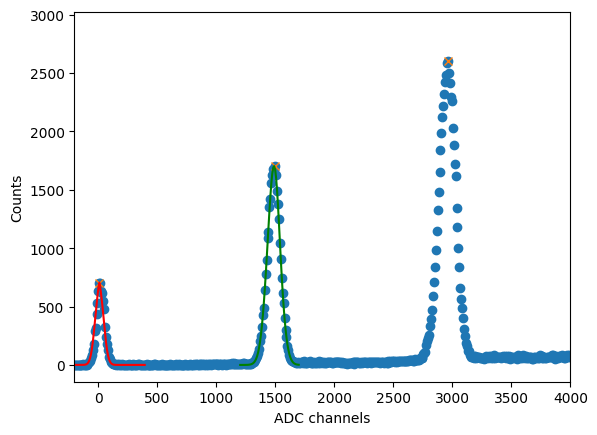

0 peak: Параметры гауссианов:  [562.80313523  19.521       48.92028507   4.31772632  19.521
 200.        ]
0 peak: cov0:  [  4.07930834   0.21748071   0.42402044   3.46611387  57.35252058
 112.4132178 ]
Стандартное отклонение:  6.462394284377955
Квадрат коэффициента корреляции:  0.9967653993722408
1 peak: Параметры гауссианов:  [1063.53076875 1551.44638096   84.54418621  349.23054413 1563.553
   63.93628725]
Стандартное отклонение:  16.775201997629505
Квадрат коэффициента корреляции:  0.9988760090122191
mean0= 19.520999999999997 +- 0.21748071225599286  sigma0= 48.920285072758844 +- 0.42402044038248354
mean1= 1563.5529999999935 +- 8.598448130780032  sigma1= 63.93628725356875 +- 18.09683460846091
R= 37.50729183368618  Gain= 2170682.5025407537 +- 12393.902770941746
Eff= 98.74624513517514 +- 0.09819646492725553  mu= 4.3790272454823755 +- 0.0815592502477882  NevP0= 6269.0  NevTotal= 500018.0


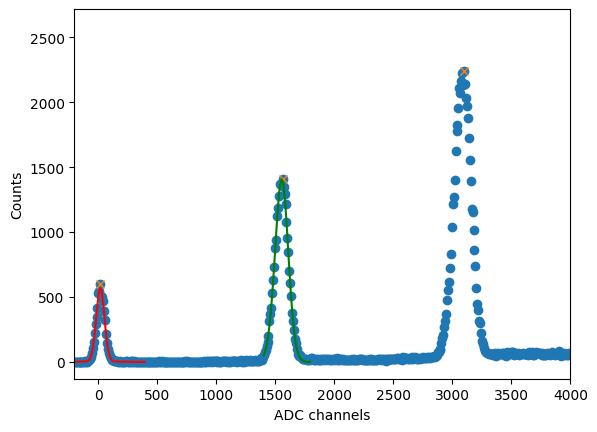

0 peak: Параметры гауссианов:  [368.63129292  25.56515036  51.39803413  44.08639472  19.37604886
  14.330717  ]
0 peak: cov0:  [4.56162114 0.22314375 0.40709424 5.01722038 0.92742684 1.85582436]
Стандартное отклонение:  3.813770127408672
Квадрат коэффициента корреляции:  0.9976629132930693
1 peak: Параметры гауссианов:  [ 815.14526905 1834.28717847   73.63569968  354.02406828 1760.906048
   66.68496513]
Стандартное отклонение:  12.865369662522127
Квадрат коэффициента корреляции:  0.9985611155070423
mean0= 19.376048862789304 +- 0.9274268412210432  sigma0= 14.330716995824744 +- 1.8558243609329406
mean1= 1760.9060479978639 +- 16.346464085083856  sigma1= 66.68496512627301 +- 7.0248511950253505
R= 26.740557040186495  Gain= 2448335.718930913 +- 24284.556786729605
Eff= 99.16214894060661 +- 0.3314112948497865  mu= 4.782085113705371 +- 0.5034349595374792  NevP0= 4179.0  NevTotal= 498776.0


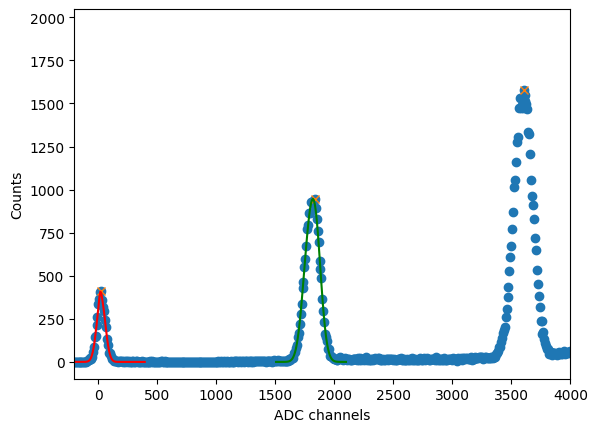

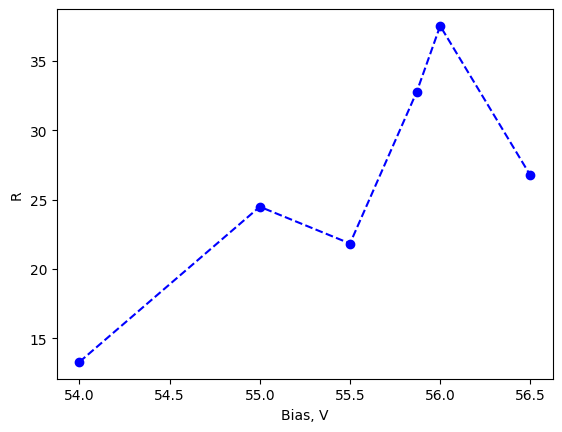

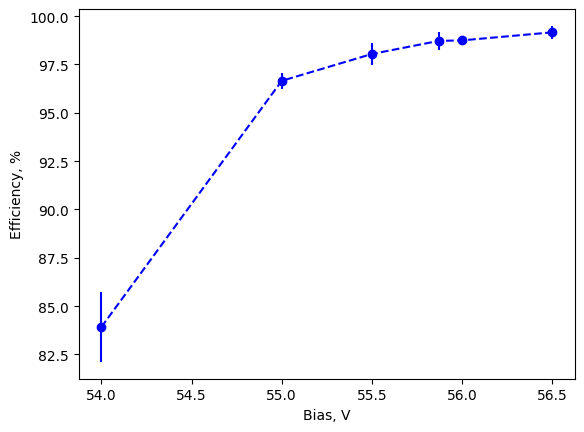

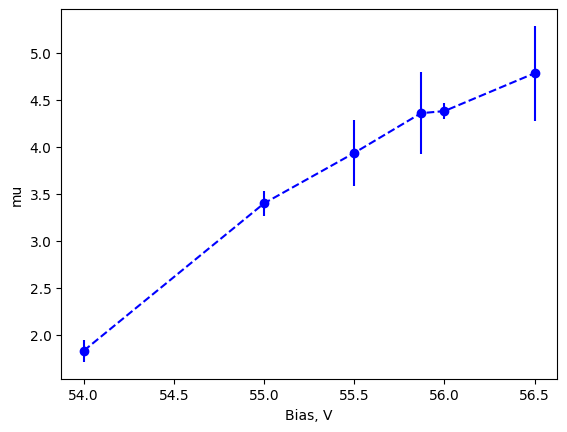

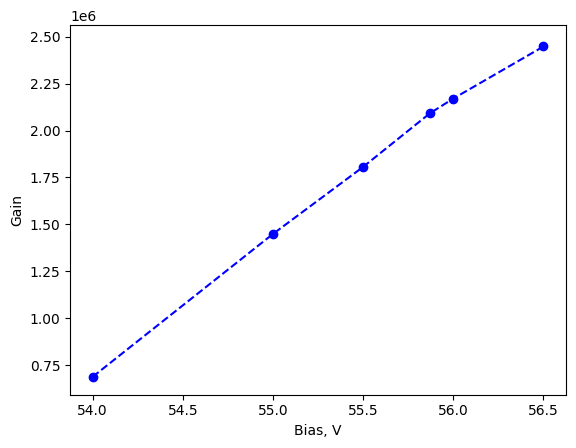

In [4]:
Uarray,Rarray,Gainarray,errGainarray,Effarray,errEffarray,muarray,errmuarray = np.array([]),np.array([]),np.array([]),np.array([]),np.array([]),np.array([]),np.array([]),np.array([])

for U in Ulist:
    try:
        file = open(path + "/" + prefix + U + fileName)
    
        x,y = np.array([]), np.array([])
    
        for line in file.readlines():
            line = line.replace(',','.')
            j = line.split()
            j[0] = float(j[0])
            j[1] = float(j[1])
            x = np.append(x, j[0])
            y = np.append(y, j[1])
    except FileNotFoundError:
        print('Can`t open the file',fileName,'. No such file or directory')
    except ValueError:
        print('It`s not a number. Check the data in the file')
    except IndexError:
        print('The index is not in the range of elements. Check the data in the file')
            
    plt.plot(x, y,'o')  
    #plt.bar(x, y, width=8.0)  
    plt.xlabel('ADC channels')
    plt.ylabel('Counts')
    
    if analysis:
        plt.xlim([Xleft, Xright])  
        # Find peaks
        thresh_top    = np.median(y) + 1.0 * np.std(y)
        i_peaks, _ = find_peaks(y,  height =  thresh_top, width=2)
        #print('i_peaks=',i_peaks,' x[i_peaks]=',x[i_peaks],' y[i_peaks]=',y[i_peaks])
    
        peak0 = x[i_peaks][0]
        peak1 = x[i_peaks][1]
    
        #plt.plot([min(y), max(y)], [thresh_top, thresh_top],'--',  color='r', label='peaks-threshold') # Plot threshold
        plt.plot(x[i_peaks], y[i_peaks], 'x')
    
        #вектор начальных приближений
        init_valsp0 = [.025, 0.0, 30., .025, 0.0, 30.]
        init_valsp1 = [.025, peak1-100., 5., .025, peak1-100., 5.]
    
        x0 = x[x<FitXLimitP0]
        y0 = y[x<FitXLimitP0]
        p0, cov0 = curve_fit(DoubleGauss, x0, y0, p0=init_valsp0, bounds=(0, [5000., peak0, 200., 5000., peak0, 200.]))
        fit_y0 = DoubleGauss(x0, *p0)    
        print("0 peak: Параметры гауссианов: ",p0)
        #print("0 peak: cov0: ",cov0)
        print("0 peak: cov0: ",np.sqrt(np.diag(cov0)))
        #оценка погрешности аппроксимации и достоверности модели
        print("Стандартное отклонение: ", np.std(y0-fit_y0))
        slope0, ic0, r_value0, p_value0, std_err0 = stats.linregress(y0,fit_y0)
        print("Квадрат коэффициента корреляции: ", r_value0**2)
        dp0 = \
          [np.sqrt(cov0[j,j]) for j in range(p0.size)]

        x1 = x[(x>FitXLimitLeftP1[Ulist.index(U)]) & (x<FitXLimitRightP1[Ulist.index(U)])]
        y1 = y[(x>FitXLimitLeftP1[Ulist.index(U)]) & (x<FitXLimitRightP1[Ulist.index(U)])]
        p1, cov1 = curve_fit(DoubleGauss, x1, y1, p0=init_valsp1, bounds=(0, [7000., peak1, 150., 7000., peak1, 150.]))    ##55,87
        fit_y1 = DoubleGauss(x1, *p1)       
        print("1 peak: Параметры гауссианов: ",p1)
        print("Стандартное отклонение: ", np.std(y1-fit_y1))
        slope1, ic1, r_value1, p_value1, std_err1 = stats.linregress(y1,fit_y1)
        print("Квадрат коэффициента корреляции: ", r_value1**2)
        dp1 = \
          [np.sqrt(cov1[j,j]) for j in range(p1.size)]
            
        sigma0 = p0[5]
        errsigma0 = dp0[5]
        mean0 = p0[4]
        errmean0 = dp0[4]
        if p0[2]<p0[5]:
            sigma0 = p0[2]        
            errsigma0 = dp0[2]
            mean0 = p0[1]
            errmean0 = dp0[1]

        sigma1 = p1[5]
        errsigma1 = dp1[5]
        mean1 = p1[4]
        errmean1 = dp1[4]
        if p1[2]<p1[5]:
            sigma1 = p1[2]        
            errsigma1 = dp1[2]
            mean1 = p1[1]
            errmean1 = dp1[1]

        print("mean0=",mean0,'+-',errmean0," sigma0=",sigma0,'+-',errsigma0)
        print("mean1=",mean1,'+-',errmean1," sigma1=",sigma1,'+-',errsigma1)
    
        R = (mean1-mean0)/sqrt(pow(sigma1,2)-pow(sigma0,2))
        Gain = (mean1-mean0)*4.*pow(10.0,-14)/(1.6*pow(10,-19)*pow(10.,float(PSAUGAIN)/20.))
        errGain = (errmean1+errmean0)*4.*pow(10.0,-14)/(1.6*pow(10,-19)*pow(10.,float(PSAUGAIN)/20.))
        print("R=",R," Gain=",Gain,'+-',errGain)
    
        NevP0 = sum(y[x<(mean0+5*sigma0)])
        NevTotal = sum(y)
        Eff = (1.-NevP0/NevTotal)*100.
        errNevP0 = sum(y[x<(mean0+1*sigma0)])
        errEff =  (1.-errNevP0/NevTotal)*100.-Eff
        mu = -math.log(NevP0/NevTotal)
        errmu = -math.log(errNevP0/NevTotal)-mu
        print('Eff=',Eff,'+-',errEff,' mu=',mu,'+-',errmu,' NevP0=',NevP0,' NevTotal=',NevTotal)
    
        U = U.replace(',','.')
        Uarray = np.append(Uarray, float(U))
        Rarray = np.append(Rarray, R)
        Gainarray = np.append(Gainarray, Gain)
        errGainarray = np.append(errGainarray, errGain)
        Effarray = np.append(Effarray, Eff)
        errEffarray = np.append(errEffarray, errEff)
        muarray = np.append(muarray, mu)
        errmuarray = np.append(errmuarray, errmu)

        plt.plot(x0, fit_y0, 'r')
        plt.plot(x1, fit_y1, 'g')  
    
    plt.savefig(U + outSpectr)
    plt.show()    
    
if analysis:
    plt.plot(Uarray, Rarray,'ob--')
    plt.xlabel('Bias, V')
    plt.ylabel('R')
    plt.savefig(outR)
    plt.show()

    #plt.plot(Uarray, Effarray,'ob--')
    plt.errorbar(Uarray, Effarray, yerr=errEffarray, fmt='ob--')
    plt.xlabel('Bias, V')
    plt.ylabel('Efficiency, %')
    plt.savefig(outEff)
    plt.show()
    
    #plt.plot(Uarray, muarray,'ob--')
    plt.errorbar(Uarray, muarray, yerr=errmuarray, fmt='ob--')
    plt.xlabel('Bias, V')
    plt.ylabel('mu')
    plt.savefig(outmu)
    plt.show()

    #plt.plot(Uarray, Gainarray,'ob--')
    plt.errorbar(Uarray, Gainarray, yerr=errGainarray, fmt='ob--')
    plt.xlabel('Bias, V')
    plt.ylabel('Gain')
    plt.savefig(outGain)
    plt.show()